# The Perceptron: Theory and Intuition 🧠

**The Birth of Artificial Neural Networks (1957)**

> *"The Perceptron represents the first step toward machines that can perceive, recognize, and make decisions based on what they 'see'."* - Frank Rosenblatt

Welcome to the foundation of neural networks! This notebook explores the theoretical underpinnings and intuitive understanding of the Perceptron - the first artificial neural network capable of learning.

---

## 📚 Table of Contents

1. [**Historical Context: The 5 Ws**](#historical)
2. [**Mathematical Foundation**](#math)
3. [**Architectural Intuition**](#architecture)  
4. [**The Learning Process**](#learning)
5. [**Capabilities and Limitations**](#limitations)
6. [**Connection to Modern AI**](#modern)

---


<a id="historical"></a>
## 🕰️ Historical Context: The 5 Ws

### **WHO**: Frank Rosenblatt (1928-1971)
- **Background**: American psychologist and computer scientist at Cornell University
- **Vision**: Create machines that could mimic biological neural networks
- **Inspiration**: Warren McCulloch and Walter Pitts' 1943 paper on artificial neurons

### **WHAT**: The Perceptron Algorithm
- **Definition**: A linear classifier that learns to separate data into two categories
- **Innovation**: First artificial neural network capable of **learning from experience**
- **Core Idea**: Adjust connection weights based on prediction errors

### **WHEN**: 1957-1962
- **1957**: Initial conception and mathematical formulation
- **1958**: Publication in *Psychological Review*
- **1962**: Physical implementation - the "Mark I Perceptron" 
- **1969**: Minsky & Papert's critique leads to "AI Winter"

### **WHERE**: Cornell Aeronautical Laboratory
- **Setting**: Post-WWII optimism about technology
- **Context**: Early computers, cybernetics movement
- **Goal**: Bridge psychology, biology, and engineering

### **WHY**: The Dream of Thinking Machines
- **Motivation**: Understand how the brain learns and recognizes patterns
- **Promise**: Machines that could see, learn, and make decisions
- **Impact**: Launched the field of machine learning

---

### 📰 Historical Headlines

**1958 New York Times**: *"New Navy Device Learns By Doing"*
> "The Navy revealed today a electronic computer that it expects will be able to walk, talk, see, write, reproduce itself and be conscious of its existence."

**The Reality**: A significant step toward AI, but the hype exceeded the capabilities!

---


<a id="math"></a>
## 📐 Mathematical Foundation

### **The Perceptron Equation**

The Perceptron computes a simple weighted sum of inputs:

$$y = f(\mathbf{w} \cdot \mathbf{x} + b)$$

Where:
- $\mathbf{x} = [x_1, x_2, ..., x_d]$ is the input vector
- $\mathbf{w} = [w_1, w_2, ..., w_d]$ are the weights  
- $b$ is the bias term
- $f()$ is the activation function (step function)

### **Step Activation Function**

$$f(z) = \begin{cases} 
1 & \text{if } z \geq 0 \\
0 & \text{if } z < 0 
\end{cases}$$

This creates a **linear decision boundary** in the input space.

### **The Learning Rule**

When the Perceptron makes an error, it updates its weights:

$$\mathbf{w}_{new} = \mathbf{w}_{old} + \eta (t - y) \mathbf{x}$$
$$b_{new} = b_{old} + \eta (t - y)$$

Where:
- $\eta$ is the learning rate
- $t$ is the target (correct) output  
- $y$ is the predicted output
- $(t - y)$ is the error

### **Geometric Interpretation**

The decision boundary is a **hyperplane** defined by:
$$\mathbf{w} \cdot \mathbf{x} + b = 0$$

- **Above the line**: Positive class (output = 1)
- **Below the line**: Negative class (output = 0)
- **Learning**: Rotates and shifts this line to separate the classes

---


In [ ]:
# Simple Perceptron Math Demonstration
import numpy as np
import matplotlib.pyplot as plt

# Simple 2D example
print("🔢 Perceptron Math Demonstration")
print("=" * 40)

# Example input
x = np.array([0.5, 1.2])  # 2D input point
w = np.array([1.0, -0.5])  # weights
b = 0.3  # bias

# Compute weighted sum
z = np.dot(w, x) + b
print(f"Input x: {x}")
print(f"Weights w: {w}")  
print(f"Bias b: {b}")
print(f"Weighted sum z = w·x + b: {z:.3f}")

# Apply step function
output = 1 if z >= 0 else 0
print(f"Step function output: {output}")

# Show what learning looks like
print("\n🎯 Learning Example:")
print("-" * 20)
target = 0  # correct answer should be 0
prediction = output  # we predicted 1
error = target - prediction
learning_rate = 0.1

print(f"Target: {target}")
print(f"Prediction: {prediction}")
print(f"Error: {error}")

if error != 0:
    # Update weights
    w_new = w + learning_rate * error * x
    b_new = b + learning_rate * error
    
    print(f"Weight update: w = {w} + {learning_rate} × {error} × {x} = {w_new}")
    print(f"Bias update: b = {b} + {learning_rate} × {error} = {b_new}")
else:
    print("No error - no weight update needed!")

print("\n💡 Key Insight: The Perceptron only learns from mistakes!")


🔢 Perceptron Math Demonstration
Input x: [0.5 1.2]
Weights w: [ 1.  -0.5]
Bias b: 0.3
Weighted sum z = w·x + b: 0.200
Step function output: 1

🎯 Learning Example:
--------------------
Target: 0
Prediction: 1
Error: -1
Weight update: w = [ 1.  -0.5] + 0.1 × -1 × [0.5 1.2] = [ 0.95 -0.62]
Bias update: b = 0.3 + 0.1 × -1 = 0.19999999999999998

💡 Key Insight: The Perceptron only learns from mistakes!


<a id="architecture"></a>
## 🏗️ Architectural Intuition

### **Biological Inspiration**

The Perceptron was inspired by biological neurons:

```
BIOLOGICAL NEURON          ARTIFICIAL PERCEPTRON
      
Dendrites  ─┐                Inputs  ─┐
Dendrites  ─┤                Inputs  ─┤
Dendrites  ─┤─► [Cell Body] ─► Inputs  ─┤─► [Σ + f] ─► Output
Dendrites  ─┤                Inputs  ─┤
Dendrites  ─┘                Inputs  ─┘

- Dendrites = Input features
- Synapses = Weights  
- Cell body = Summation + activation
- Axon = Output
```

### **Information Flow**

1. **Input Stage**: Receive feature values (x₁, x₂, ..., xₙ)
2. **Weighting**: Multiply each input by its weight (w₁x₁, w₂x₂, ..., wₙxₙ)  
3. **Summation**: Add all weighted inputs plus bias (Σwᵢxᵢ + b)
4. **Activation**: Apply step function to get binary output
5. **Decision**: Output represents class prediction (0 or 1)

### **Key Architectural Properties**

- **Single Layer**: Only one processing unit (no hidden layers)
- **Linear**: Decision boundary is always a straight line/hyperplane
- **Binary**: Can only distinguish between two classes
- **Feedforward**: Information flows only in one direction
- **Trainable**: Weights adapt based on experience

### **Conceptual Metaphor: The Digital Bouncer**

Think of the Perceptron as a digital bouncer at a club:

- **Inputs**: Person's attributes (age, dress code, ID, etc.)
- **Weights**: How much each attribute matters for admission
- **Bias**: General strictness/leniency of the club
- **Decision**: Let in (1) or deny entry (0)
- **Learning**: Adjust criteria based on mistakes

If the bouncer makes a wrong decision, they adjust their criteria for next time!

---


C:\Users\jason\AppData\Local\Temp\ipykernel_1125748\490875100.py:51: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jason\AppData\Local\Temp\ipykernel_1125748\490875100.py:51: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jason\Cursor\AI-From_Scratch_To_Scale\models\01_perceptron\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jason\Cursor\AI-From_Scratch_To_Scale\models\01_perceptron\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


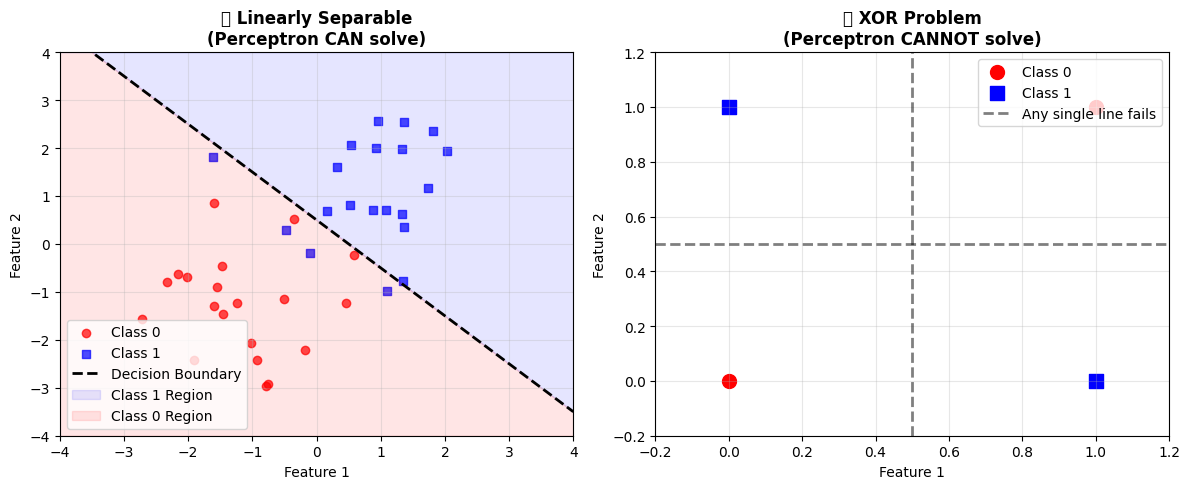

🎯 Key Insight: The Perceptron can only learn patterns that are linearly separable!
   This fundamental limitation led to the 'AI Winter' and motivated multi-layer networks.


In [ ]:
# Visualize the Decision Boundary Concept
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create sample 2D data
np.random.seed(42)
class_0 = np.random.randn(20, 2) + [-1, -1]  # Bottom-left cluster  
class_1 = np.random.randn(20, 2) + [1, 1]    # Top-right cluster

# Plot 1: Linearly Separable Data (Perceptron can solve)
ax1.scatter(class_0[:, 0], class_0[:, 1], c='red', marker='o', label='Class 0', alpha=0.7)
ax1.scatter(class_1[:, 0], class_1[:, 1], c='blue', marker='s', label='Class 1', alpha=0.7)

# Draw a decision boundary
x_line = np.linspace(-4, 4, 100)
y_line = -x_line + 0.5  # Simple linear boundary
ax1.plot(x_line, y_line, 'k--', linewidth=2, label='Decision Boundary')
ax1.fill_between(x_line, y_line, 4, alpha=0.1, color='blue', label='Class 1 Region')
ax1.fill_between(x_line, -4, y_line, alpha=0.1, color='red', label='Class 0 Region')

ax1.set_title('Linearly Separable\n(Perceptron CAN solve)', fontsize=12, weight='bold')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)

# Plot 2: XOR-like Data (Perceptron cannot solve)
xor_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_labels = np.array([0, 1, 1, 0])  # XOR pattern

colors = ['red' if label == 0 else 'blue' for label in xor_labels]
markers = ['o' if label == 0 else 's' for label in xor_labels]

for i, (point, color, marker) in enumerate(zip(xor_data, colors, markers)):
    ax2.scatter(point[0], point[1], c=color, marker=marker, s=100, 
                label=f'Class {xor_labels[i]}' if i < 2 else "")

# Try to draw ANY single line - it cannot separate XOR
ax2.plot([-0.2, 1.2], [0.5, 0.5], 'k--', linewidth=2, alpha=0.5, label='Any single line fails')
ax2.plot([0.5, 0.5], [-0.2, 1.2], 'k--', linewidth=2, alpha=0.5)

ax2.set_title('XOR Problem\n(Perceptron CANNOT solve)', fontsize=12, weight='bold')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.2, 1.2)
ax2.set_ylim(-0.2, 1.2)

plt.tight_layout()
plt.show()

print("🎯 Key Insight: The Perceptron can only learn patterns that are linearly separable!")
print("   This fundamental limitation led to the 'AI Winter' and motivated multi-layer networks.")


<a id="learning"></a>
## 🎓 The Learning Process

### **Perceptron Learning Algorithm**

The Perceptron learns through **supervised learning** with these steps:

1. **Initialize**: Start with random weights and zero bias
2. **Present Sample**: Show the Perceptron an input-output pair
3. **Make Prediction**: Compute output using current weights  
4. **Check Error**: Compare prediction with correct answer
5. **Update Weights**: If wrong, adjust weights to reduce error
6. **Repeat**: Continue until no more errors (or max iterations)

### **Learning Rule Intuition**

The weight update rule has beautiful geometric interpretation:

```
w_new = w_old + η(target - prediction) × input
```

**What this means:**
- **Correct prediction**: No change (target - prediction = 0)
- **False positive**: Reduce weights (target=0, prediction=1, so multiply by -1)  
- **False negative**: Increase weights (target=1, prediction=0, so multiply by +1)
- **Learning rate η**: Controls how big steps to take

### **Convergence Guarantee** 🎯

**Perceptron Convergence Theorem**: 
If the data is linearly separable, the Perceptron is **guaranteed** to find a solution in finite time!

This was revolutionary - a provable learning algorithm!

### **Why It Works**

- Each mistake moves the decision boundary closer to the correct solution
- The algorithm cannot get stuck in local optima (there's only one optimum)
- Mathematical proof shows finite convergence for separable data

### **Learning Rate Effects**

- **Too small**: Slow learning, many iterations
- **Too large**: Might overshoot, unstable learning  
- **Just right**: Fast, stable convergence

---


<a id="limitations"></a>
## ⚠️ Capabilities and Limitations

### **What the Perceptron CAN Do** ✅

- **Linear Classification**: Perfect for linearly separable data
- **Boolean Functions**: AND, OR, NAND gates
- **Simple Patterns**: Basic pattern recognition tasks
- **Guaranteed Learning**: Provable convergence for valid problems
- **Fast Training**: Simple, efficient algorithm
- **Interpretable**: Weights show feature importance

### **What the Perceptron CANNOT Do** ❌

- **XOR Function**: The famous limitation that caused the AI Winter
- **Non-linear Patterns**: Curved boundaries, complex shapes
- **Multi-class**: Only handles binary classification natively  
- **Complex Features**: Cannot learn feature interactions
- **Non-separable Data**: Gets stuck on overlapping distributions

### **The XOR Crisis (1969)** 💥

Minsky and Papert proved that a single Perceptron cannot solve XOR:

| Input A | Input B | XOR Output |
|---------|---------|------------|
| 0 | 0 | 0 |
| 0 | 1 | 1 |  
| 1 | 0 | 1 |
| 1 | 1 | 0 |

**Why XOR is impossible**: No single straight line can separate the 1s from the 0s!

This revelation led to:
- Funding cuts for neural network research
- The "AI Winter" of the 1970s-80s
- Focus shift to symbolic AI and expert systems

### **Historical Impact**

**The Good**:
- Launched machine learning as a field
- Introduced the concept of learning algorithms  
- Inspired biological neural modeling

**The Bad**:
- Overhyped promises led to disappointment
- Limitations weren't initially understood
- Caused decades-long setback in neural network research

**The Redemption**:
- Multi-layer networks (1980s) solved the XOR problem
- Backpropagation enabled deep learning
- Modern AI traces back to these foundations

---


<a id="modern"></a>
## 🚀 Connection to Modern AI

### **The Perceptron's DNA in Modern Neural Networks**

Every modern neural network contains Perceptron-like units:

```
PERCEPTRON (1957)          MODERN NEURON (2024)
     
[Inputs] → [Σ + f] → [Output]    [Inputs] → [Σ + f] → [Output]

Same basic structure! The evolution:
- Multiple layers instead of one
- Better activation functions (ReLU, sigmoid)
- Advanced optimization (Adam, SGD with momentum)
- Regularization techniques (dropout, batch norm)
```

### **Modern Applications**

**Large Language Models (GPT, ChatGPT)**:
- Billions of Perceptron-like units working together
- Same basic weight update principles
- Linear transformations everywhere

**Computer Vision (CNNs)**:
- Convolutional layers = spatially-connected Perceptrons  
- Each filter is a specialized Perceptron

**Recommendation Systems**:
- Linear models for user-item predictions
- Logistic regression = Perceptron with sigmoid

### **Key Insights for Modern AI**

1. **Scalability**: What works for one unit scales to billions
2. **Simplicity**: Complex behaviors emerge from simple rules
3. **Learning**: Error-driven improvement is universal
4. **Linearity**: Even "non-linear" networks use linear building blocks
5. **Gradients**: All modern training uses Perceptron-like weight updates

### **What We Learned for the Future**

- **Single layers have limits** → Multi-layer networks
- **Linear boundaries aren't enough** → Non-linear activations  
- **Local learning is powerful** → Backpropagation
- **Simple algorithms scale** → Deep learning revolution

---

## 🎯 Key Takeaways

**The Perceptron taught us that:**

1. **Learning is possible** - Machines can improve from experience
2. **Simple rules create complex behaviors** - Basic math → intelligent decisions  
3. **Understanding limitations drives innovation** - XOR problem → MLPs
4. **Biological inspiration works** - Neural metaphors are powerful
5. **Foundation matters** - Every modern AI system builds on these principles

**Next Steps**: Ready to see the code? Head to notebook 02 for implementation details!

**Remember**: The Perceptron isn't just history - it's the foundation of every neural network you'll ever encounter. Master this, and you understand the core of all AI! 🧠✨

---

*"The Perceptron was not just a model; it was a proof of concept that machines could learn. Everything that followed built upon this fundamental insight."* - Anonymous AI Historian
